In [1]:
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
#Libraries for classifying and modeling data
library(tidyverse)
library(tidymodels)
library(broom)
library(repr)
library(ggplot2)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.1.3”
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ pars

# **Determine heart disease patients from Cleveland based on age, blood pressure, cholestorol, maximum heart rate, and ST depression.**

### Vedant Kalyani, Dylan Tan, Audrey Zeilstra, Kevin Zhu


### Introduction

Heart disease is a major health issue that affects millions of people worldwide. There are many factors that increase the risk of heart disease, including age, cholestorol, heart rate and so on.

For example, low heart rate may cause frequent failing, inability of the heart to pump enough blood (heart failure), sudden cardiac arrest or sudden death. The goal of the project is to predict whether a patient is likely to have heart disease based on these risk factors.

The question we will Try to answer is: **Is a patient likely to have heart disease, based on measurement and analysis of age, blood pressure, cholesterol, maximum heart rate, and ST depression?**

We are using the processed.cleveland.data from the Heart Disease Database as the dataset.

We are using the processed.cleveland.data from the Heart Disease Database as the dataset. Our goal of the project is to predict if a patient from Cleveland will have heart disease based on predictors. We give names to each columns using `colnames`. The predictors are selected from the following columns:

1. **Age**: patient’s age
2. **Sex**: sex (1 = male, 0 = female)
3. **Type_Chest_Pain**: chest pain type
4. **Resting_Blood_Pressure**: resting blood pressure
5. **Cholestorol**: serum cholestoral in mg/dl
6. **Fasting_Blood_Sugar**: fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
7. **Resting_ECG_Results**: resting electrocardiographic results
8. **Max_Heart_Rate**: maximum heart rate achieved
9. **Exercise_Angina**: whether exercise induced angina (1 = True, 0 = False)
10. **ST_Depression_Exercise**: ST depression induced by exercise, relative to rest
11. **Slope**: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. **Major_Vessels**: number of major vessels (0-3) colored by flourosopy
13. **Thalassemia**: (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. **Diagnosis**: diagnosis of heart disease

### Method

We first clean the data. In the original dataset, it use integers in column **num** to represent diagnosis of heart disease, but we just need to determine whether or not a patient has heart disease. Therefore, we use **mutate** to create a new column **Diagnosis**, and divided it into two cases, which are “Positive” and “Negative”.

Then. We used `initial_split()` to split the dataframe into 75% training and 25% testing data, stratifying for **Diagnosis**. The training set is what we will use for analysis.

To summarize our data, we grouped by **Diagnosis** then summarized for the mean of five columns:  **Age, Resting_Blood_Pressure, Cholestorol, Max_Heart_Rate, and ST_Depression_Exercise**. We found that the patient with “Positive” diagnosis have a relatively higher age, resting blood pressure, and cholestorol, and lower max heart rate. It is not hard to see the difference between values, and we can analysis and try to find classification of the plot based on it.

To visualize relationships for the dataframe, we generated scatter plots of two different columns of value against each other. Based on the plots we create, we can determine which are the best predictor to use. We colored the scatter plot point based on **Diagnosis**, it clearly shows the “Positive” and “Negative” diagnosis based on two variables. The plots are shown, we may not use **figure 1.3, 1.4, and 1.5**, because the dots are mix together, and it’s hard to tell the distinct distribution. **Figure 1.1 and 1.2**, have more distinct distribution, which may be what we want for the project.



In [3]:
options(repr.matrix.max.rows = 6)

#Read dataset from the repository
cleveland_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

#Make column names readable
colnames(cleveland_disease_data) <- c("Age", "Sex", "Type_Chest_Pain", "Resting_Blood_Pressure", "Cholestorol", "Fasting_Blood_Sugar", "Resting_ECG_Results",
                                         "Max_Heart_Rate", "Exercise_Angina", "ST_Depression_Exercise", "Slope", "Major_Vessels", "Thalassemia", "Diagnosis")

cleveland_tidy_data <- cleveland_disease_data |>
    mutate(Diagnosis = case_when(Diagnosis != 0 ~ 1,
                                 Diagnosis == 0 ~ 0)) |>
    mutate(Diagnosis = as.factor(Diagnosis)) |>
mutate(Sex = case_when(Sex != 0 ~ "male",
                                 Sex == 0 ~ "female"))

cleveland_tidy_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,Type_Chest_Pain,Resting_Blood_Pressure,Cholestorol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate,Exercise_Angina,ST_Depression_Exercise,Slope,Major_Vessels,Thalassemia,Diagnosis
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,female,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,male,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [4]:
set.seed(2000)
#Splitting data into training and testing datasets
cleveland_split <- initial_split(cleveland_tidy_data, prop = 0.75, strata = Diagnosis)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

head(cleveland_training)

Age,Sex,Type_Chest_Pain,Resting_Blood_Pressure,Cholestorol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate,Exercise_Angina,ST_Depression_Exercise,Slope,Major_Vessels,Thalassemia,Diagnosis
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,male,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
57,female,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
57,male,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
56,female,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0


In the above code, we split the data into a training data set to build our model on, as well as a testing set (to test it). Using `initial_split` allowed us to shuffle the data before splitting (removing bias and order) and stratify the data by Diagnosis so that an equal proportion of each is in each set.

There is 75% of data in the training set and 25% of data in the testing set. This gives us enough data to train the classifier on, as well as enough to test it on later. Therefore, our classifier is going to be reliable.

### Summarizing Data

Before we are able to visualise any data, we need to make sure that the classes actually have different averages in age, blood pressure, cholesterol, maximum heart rate, and ST depression. 
To do this, we will use `group_by` and `summarize` to create a table with the minimum, maximum and mean of each of our predictors

In [5]:
cleveland_summary_data <- cleveland_training |>
                        group_by(Diagnosis) |>
                        summarize(Mean_Age = mean(Age),
                                  Mean_RBP = mean(Resting_Blood_Pressure),
                                  Mean_Chol = mean(Cholestorol),
                                  Mean_MHR = mean(Max_Heart_Rate),
                                  Mean_STDE = mean(ST_Depression_Exercise),
                                 No._Patients = n())
cleveland_summary_data             

Diagnosis,Mean_Age,Mean_RBP,Mean_Chol,Mean_MHR,Mean_STDE,No._Patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,52.54098,128.1639,243.6885,157.7623,0.6188525,122
1,56.99038,133.5673,248.5385,139.1346,1.5605769,104


To summarize our data, we grouped by Diagnosis then summarized for the minimum, maximum and mean of Age, Resting_Blood_Pressure, Cholesterol, Max_Heart_Rate and ST_Depression_Excercise.

We can see that patients with heart disease tend to be slightly older, have , higher resting blood pressure, higher cholesterol, and lower maximum heart rates. Therefore, these trends are what we expect our classifier to predict diagnoses using later. We can also see that the number of TRUE (1) and FALSE (0) diagnoses are roughly balanced in the training set, which means our classifier is unlikely to be biased

### Visualisations

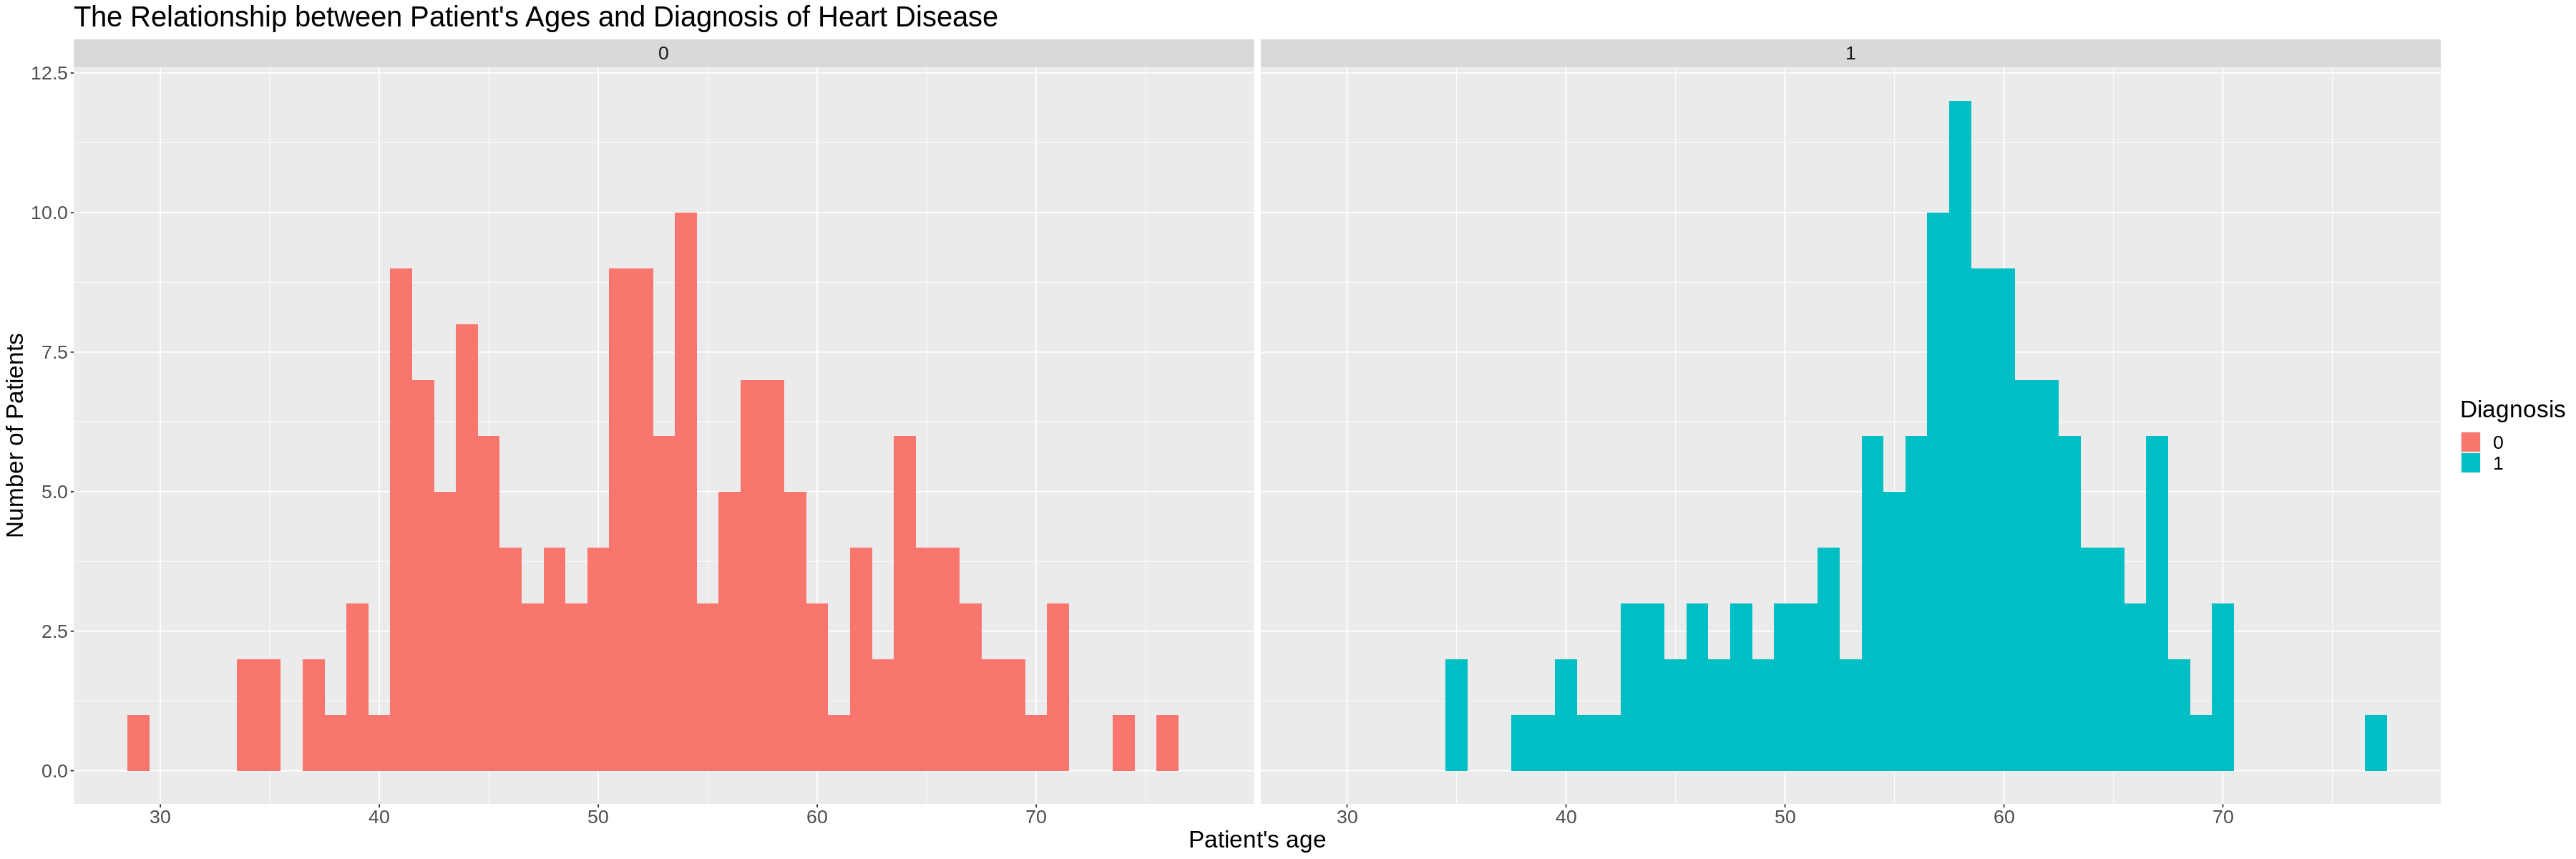

In [7]:
options(repr.plot.width = 30, repr.plot.height = 10)

age_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Age, fill = Diagnosis))+
    geom_histogram(binwidth = 1)+
    facet_grid(cols = vars(Diagnosis))+
    ggtitle("The Relationship between Patient's Ages and Diagnosis of Heart Disease")+
    labs(x = "Patient's age", y = "Number of Patients", fill = "Diagnosis")+
    theme(text = element_text(size = 20))
age_diagnosis_plot

Above are two histograms divided by the absence (Heart disease Diagnosis = 0) and presence (Heart Disease Diagnosis = 1) that illustrate different distribution shapes. This suggests that age does in fact have a positive relationship with heart disease. The plot with the absence of heart disease is normally distributed whereas the plot with the presence of heart disease contains an obvious peak. This suggests that generally speaking, older people are more likely to have heart disease.

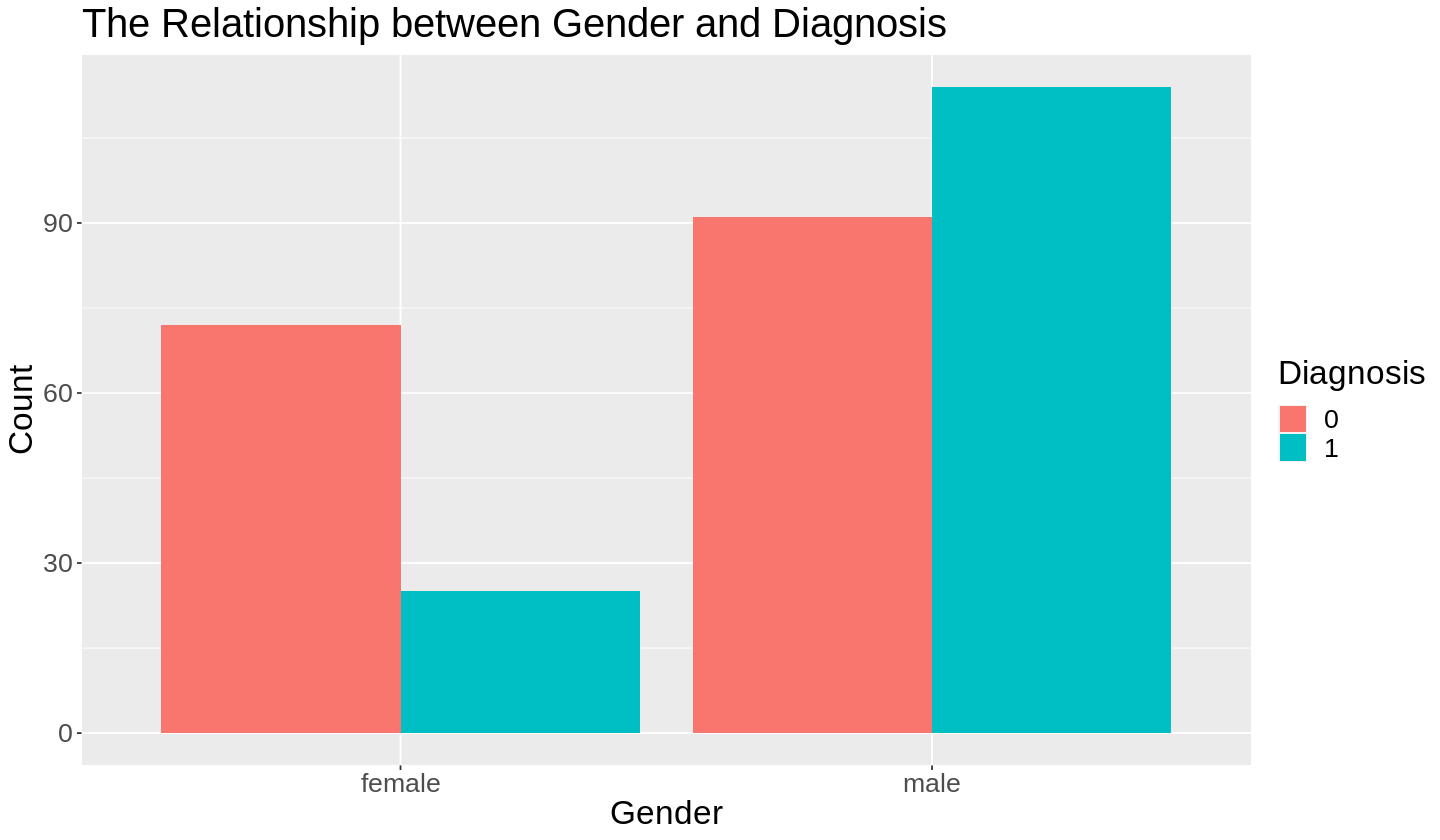

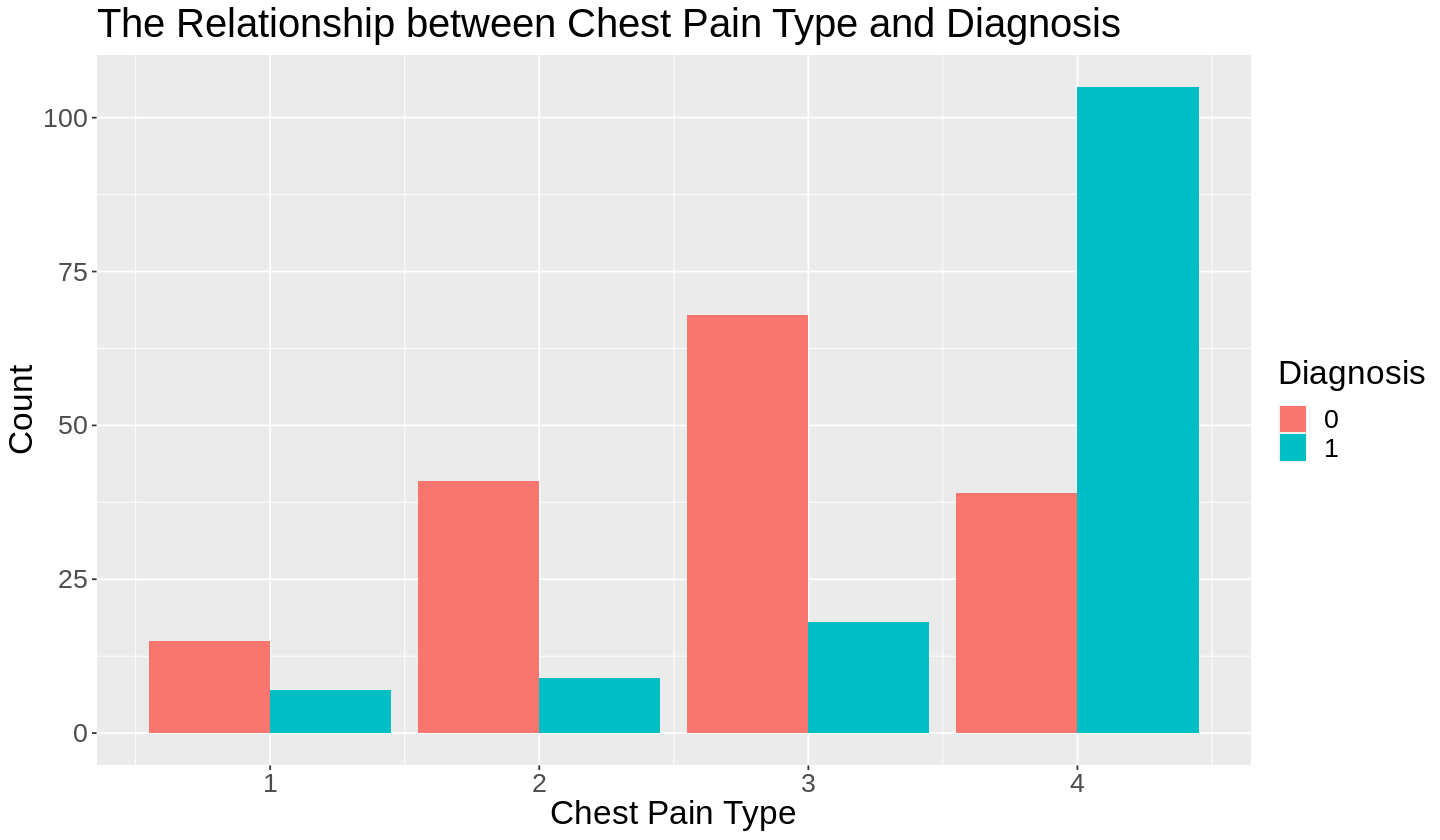

In [8]:
options(repr.plot.width = 12, repr.plot.height = 7)

sex_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Sex, fill = Diagnosis)) +
    geom_bar(position = "dodge")+
    labs(x = "Gender", y = "Count", fill = "Diagnosis")+
    ggtitle("The Relationship between Gender and Diagnosis")+
    theme(text = element_text(size = 20))
sex_diagnosis_plot

tcp_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Type_Chest_Pain, fill = Diagnosis)) +
    geom_bar(position = "dodge")+
    labs(x = "Chest Pain Type", y = "Count", fill = "Diagnosis")+
    ggtitle("The Relationship between Chest Pain Type and Diagnosis")+
    theme(text = element_text(size = 20))
tcp_diagnosis_plot

As you can see in this two bar chart we can see a relationship between Gender and Diagnosis and also a relationship between Chest Pain Type and Diagnosis. In the to bar chart (Gender vs Diagnosis). We can see that there are correlation between males and heart disease. This suggested that the probability for males to have a heart disease are highly probable compared to female. In the bar chart (Chest pain vs Diagnosis). We can see a relationship between Chest Pain type 4 and heart disease. This suggested that people that have Chest Pain type 4 are very vulnerable to heart disease.

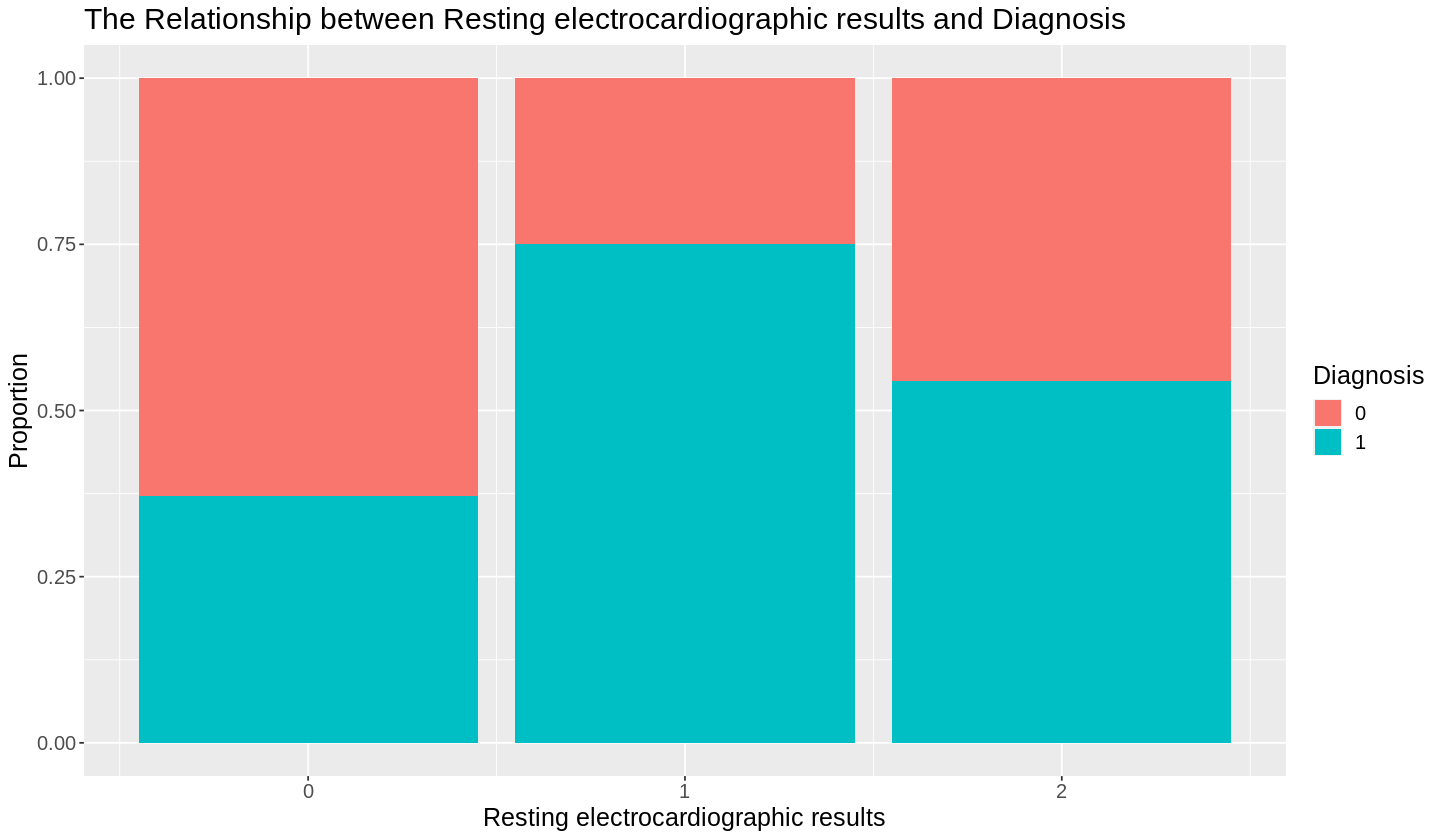

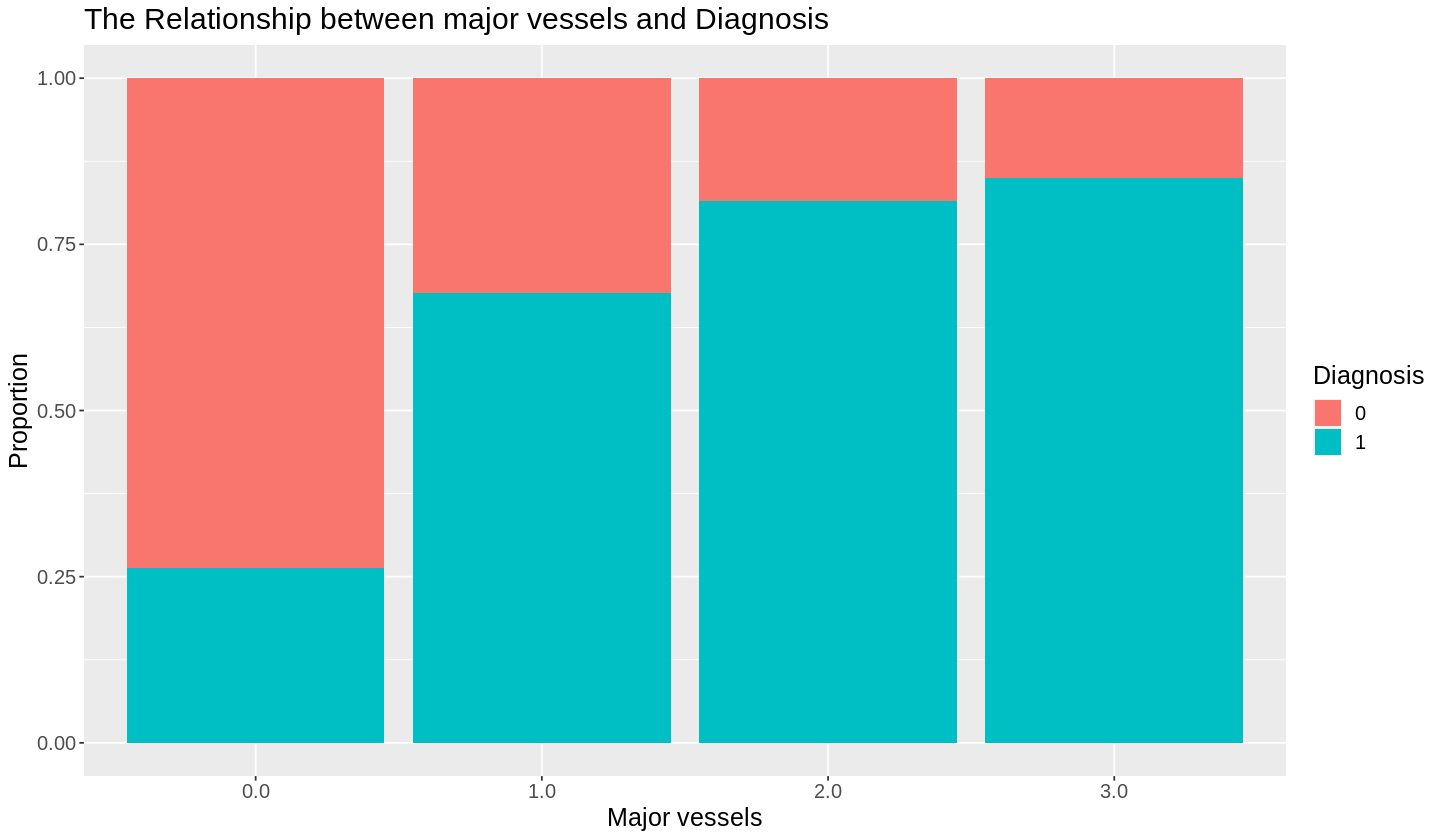

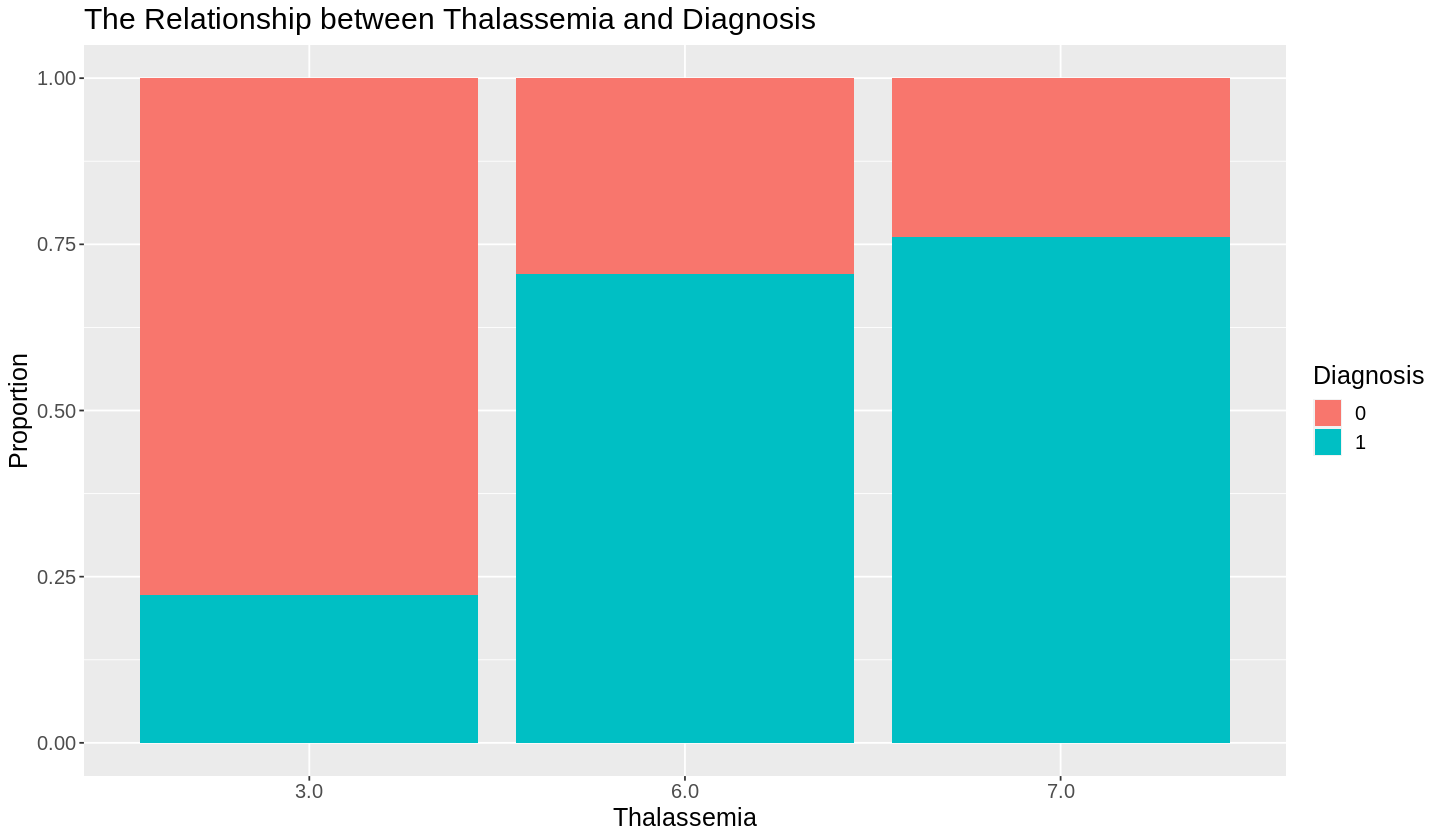

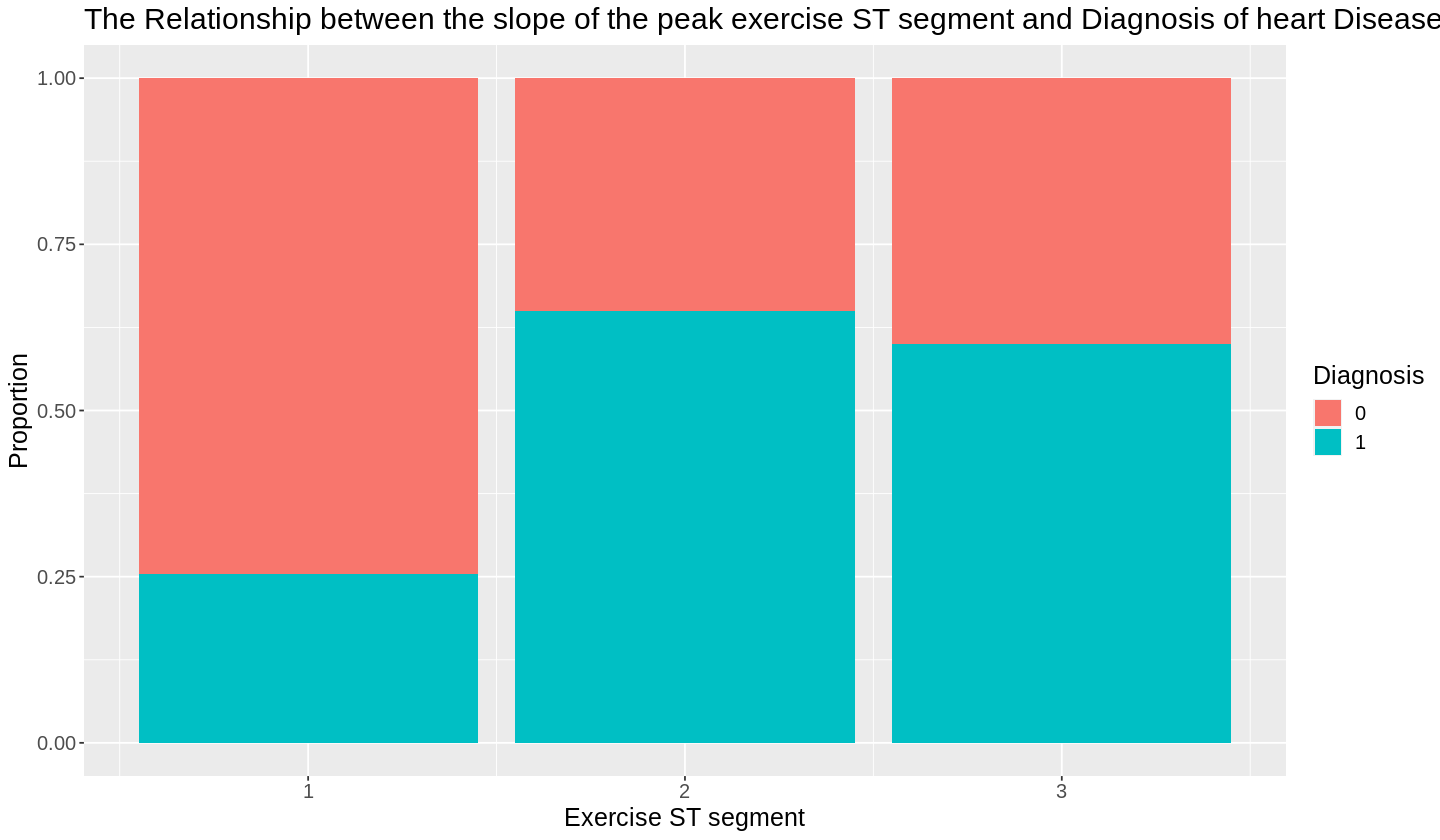

In [9]:
options(repr.plot.width = 12, repr.plot.height = 7)
ecg_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Resting_ECG_Results, fill = Diagnosis)) +
    geom_bar(position = "fill")+
    labs(x = "Resting electrocardiographic results", y = "Proportion",  fill = "Diagnosis")+
    ggtitle("The Relationship between Resting electrocardiographic results and Diagnosis")+
    theme(text = element_text(size = 15))

mv_diagnosis_plot <- cleveland_tidy_data |>
filter(Major_Vessels != "?") |>
    ggplot(aes(x = Major_Vessels, fill = Diagnosis)) +
    geom_bar(position = "fill")+
    labs(x = "Major vessels", y = "Proportion",  fill = "Diagnosis")+
    ggtitle("The Relationship between major vessels and Diagnosis")+
    theme(text = element_text(size = 15))

tha_diagnosis_plot <- cleveland_tidy_data |>
filter(Thalassemia != "?") |>
    ggplot(aes(x = Thalassemia, fill = Diagnosis)) +
    geom_bar(position = "fill")+
    labs(x = "Thalassemia", y = "Proportion",  fill = "Diagnosis")+
    ggtitle("The Relationship between Thalassemia and Diagnosis")+
    theme(text = element_text(size = 15))

slope_diagnosis_plot <- cleveland_tidy_data |>

    ggplot(aes(x = Slope, fill = Diagnosis)) +
    geom_bar(position = "fill")+
    labs(x = "Exercise ST segment", y = "Proportion",  fill = "Diagnosis")+
    ggtitle("The Relationship between the slope of the peak exercise ST segment and Diagnosis of heart Disease")+
    theme(text = element_text(size = 15))

ecg_diagnosis_plot
mv_diagnosis_plot
tha_diagnosis_plot
slope_diagnosis_plot

All four of the plots above are made based on the target variable. They illustrate a clear distinction in their correlation. 

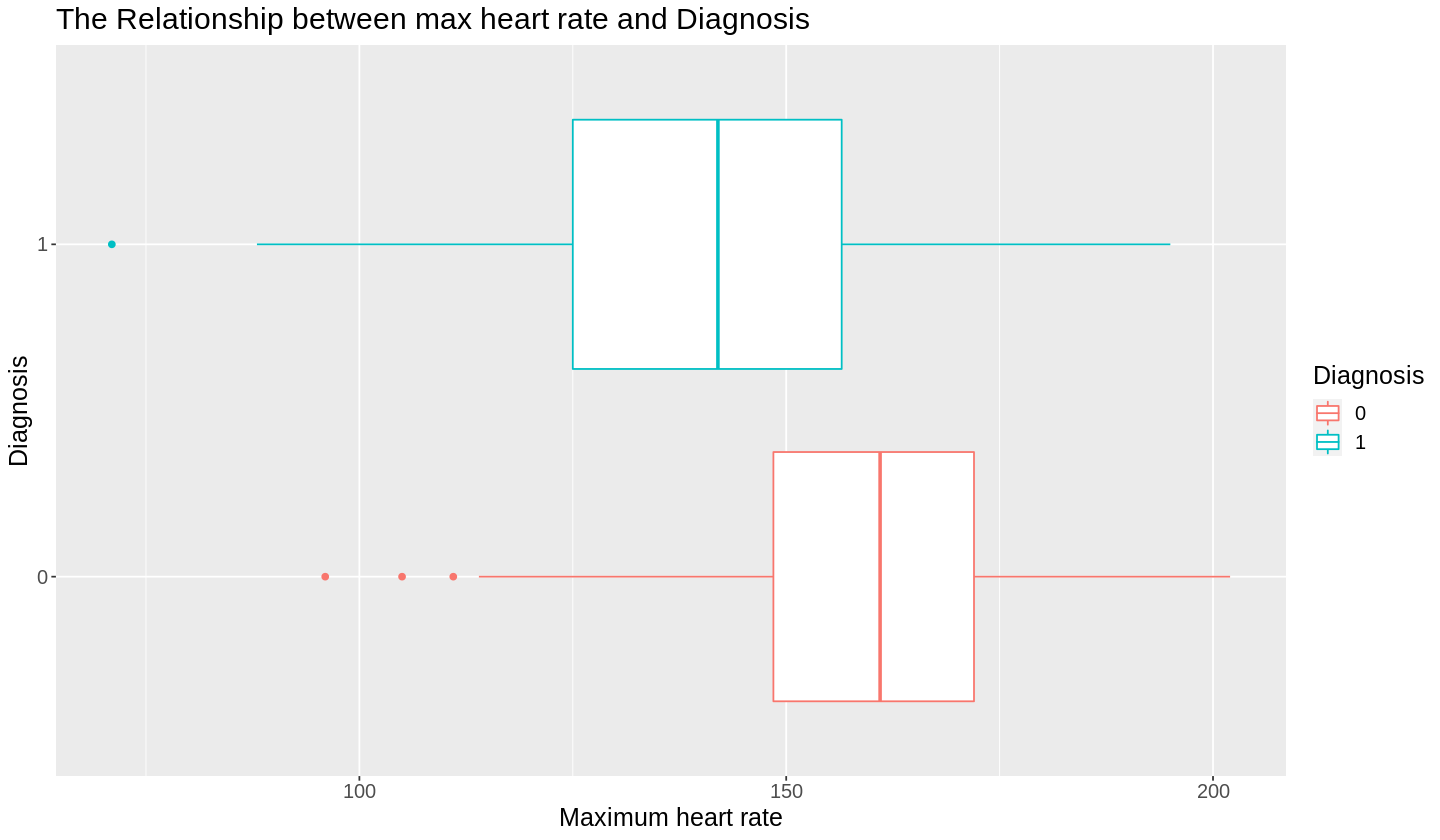

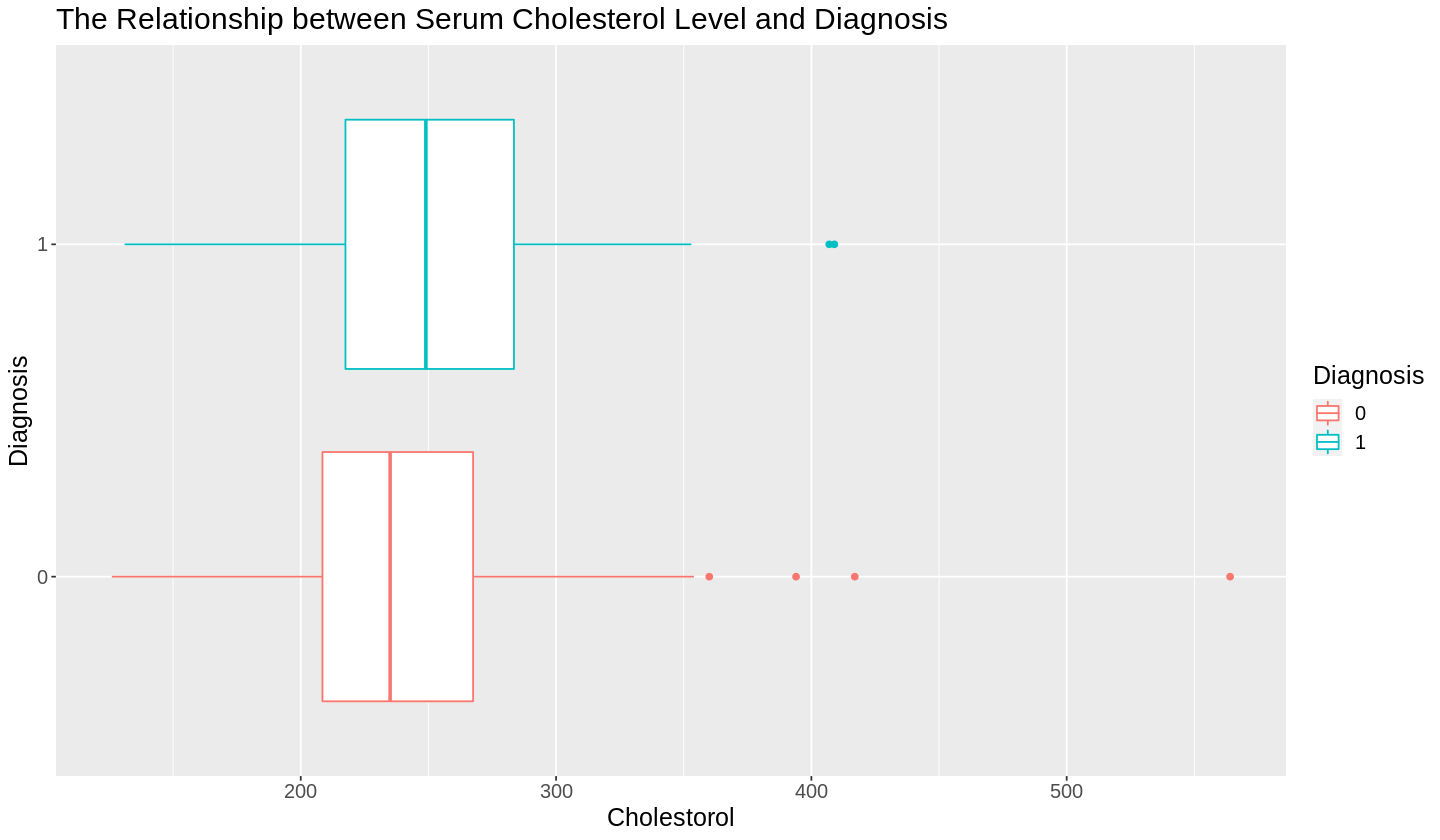

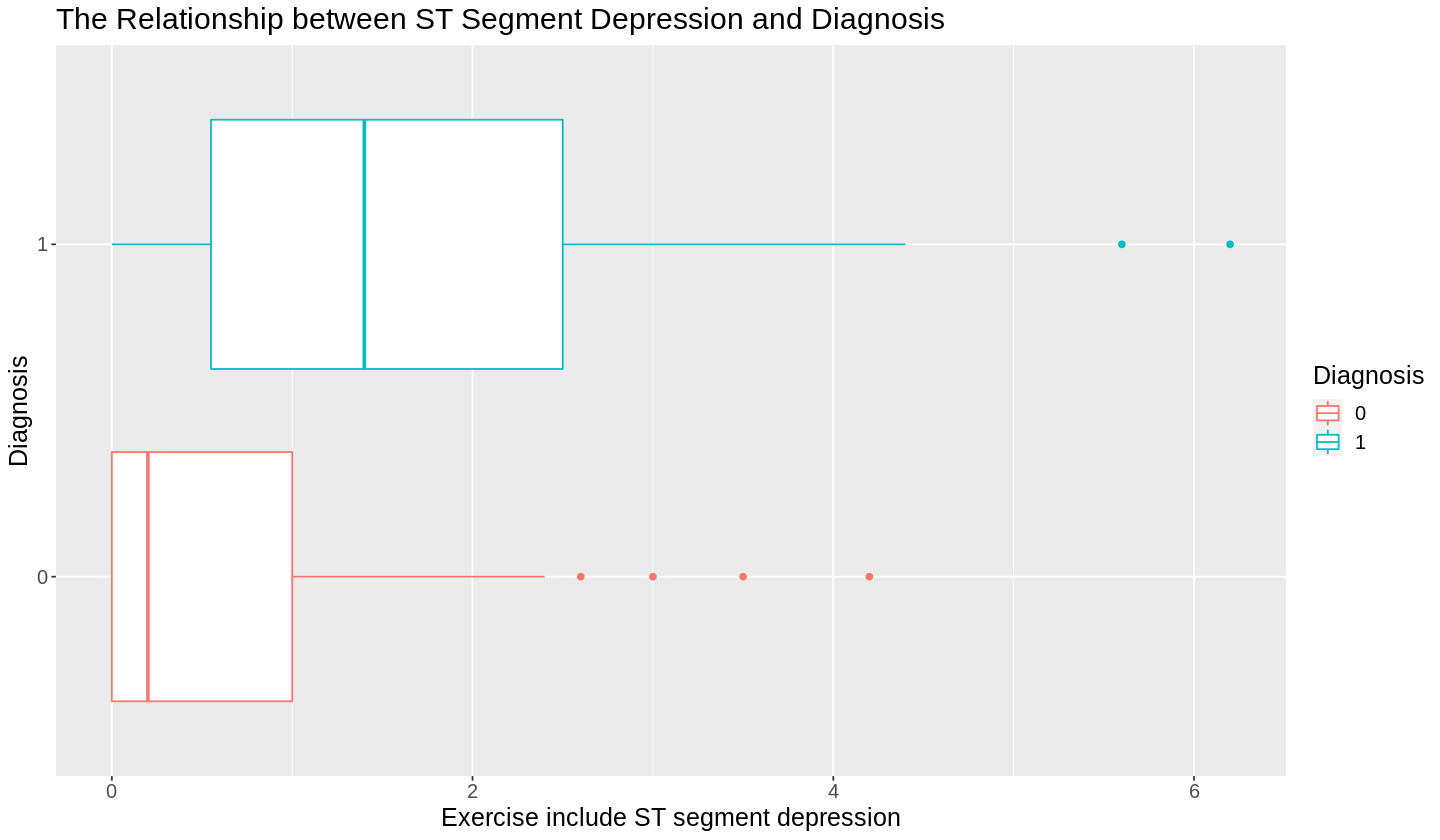

In [10]:
mhr_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Max_Heart_Rate, y = Diagnosis, color = Diagnosis)) +
    geom_boxplot() +
    labs(x = "Maximum heart rate", y = "Diagnosis", color = "Diagnosis") +
    ggtitle("The Relationship between max heart rate and Diagnosis")+
    theme(text = element_text(size = 15))
mhr_diagnosis_plot

cholestorol_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Cholestorol, y = Diagnosis, color = Diagnosis)) +
    geom_boxplot() +
    labs(x = "Cholestorol", y = "Diagnosis", color = "Diagnosis") +
    ggtitle("The Relationship between Serum Cholesterol Level and Diagnosis")+
    theme(text = element_text(size = 15))
cholestorol_diagnosis_plot

de_diagnosis_plot <- cleveland_tidy_data|>
    ggplot(aes(x = ST_Depression_Exercise, y = Diagnosis, color = Diagnosis)) +
    geom_boxplot() +
    labs(x = "Exercise include ST segment depression", y = "Diagnosis", color = "Diagnosis") +
    ggtitle("The Relationship between ST Segment Depression and Diagnosis")+
    theme(text = element_text(size = 15))
de_diagnosis_plot

Above plots are boxplots for comparing the distribution of data for the absence (0) or presence (1) of heart disease. We can see that  two of the above plots show distinct differences in how the data is distributed. This occurs for the variable Maximum heart rate as well as exercise include ST segment depression. The plot showing the relationship between cholestrol levels with heart diagnosis shows a distinct, minute difference in how the data is centered. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

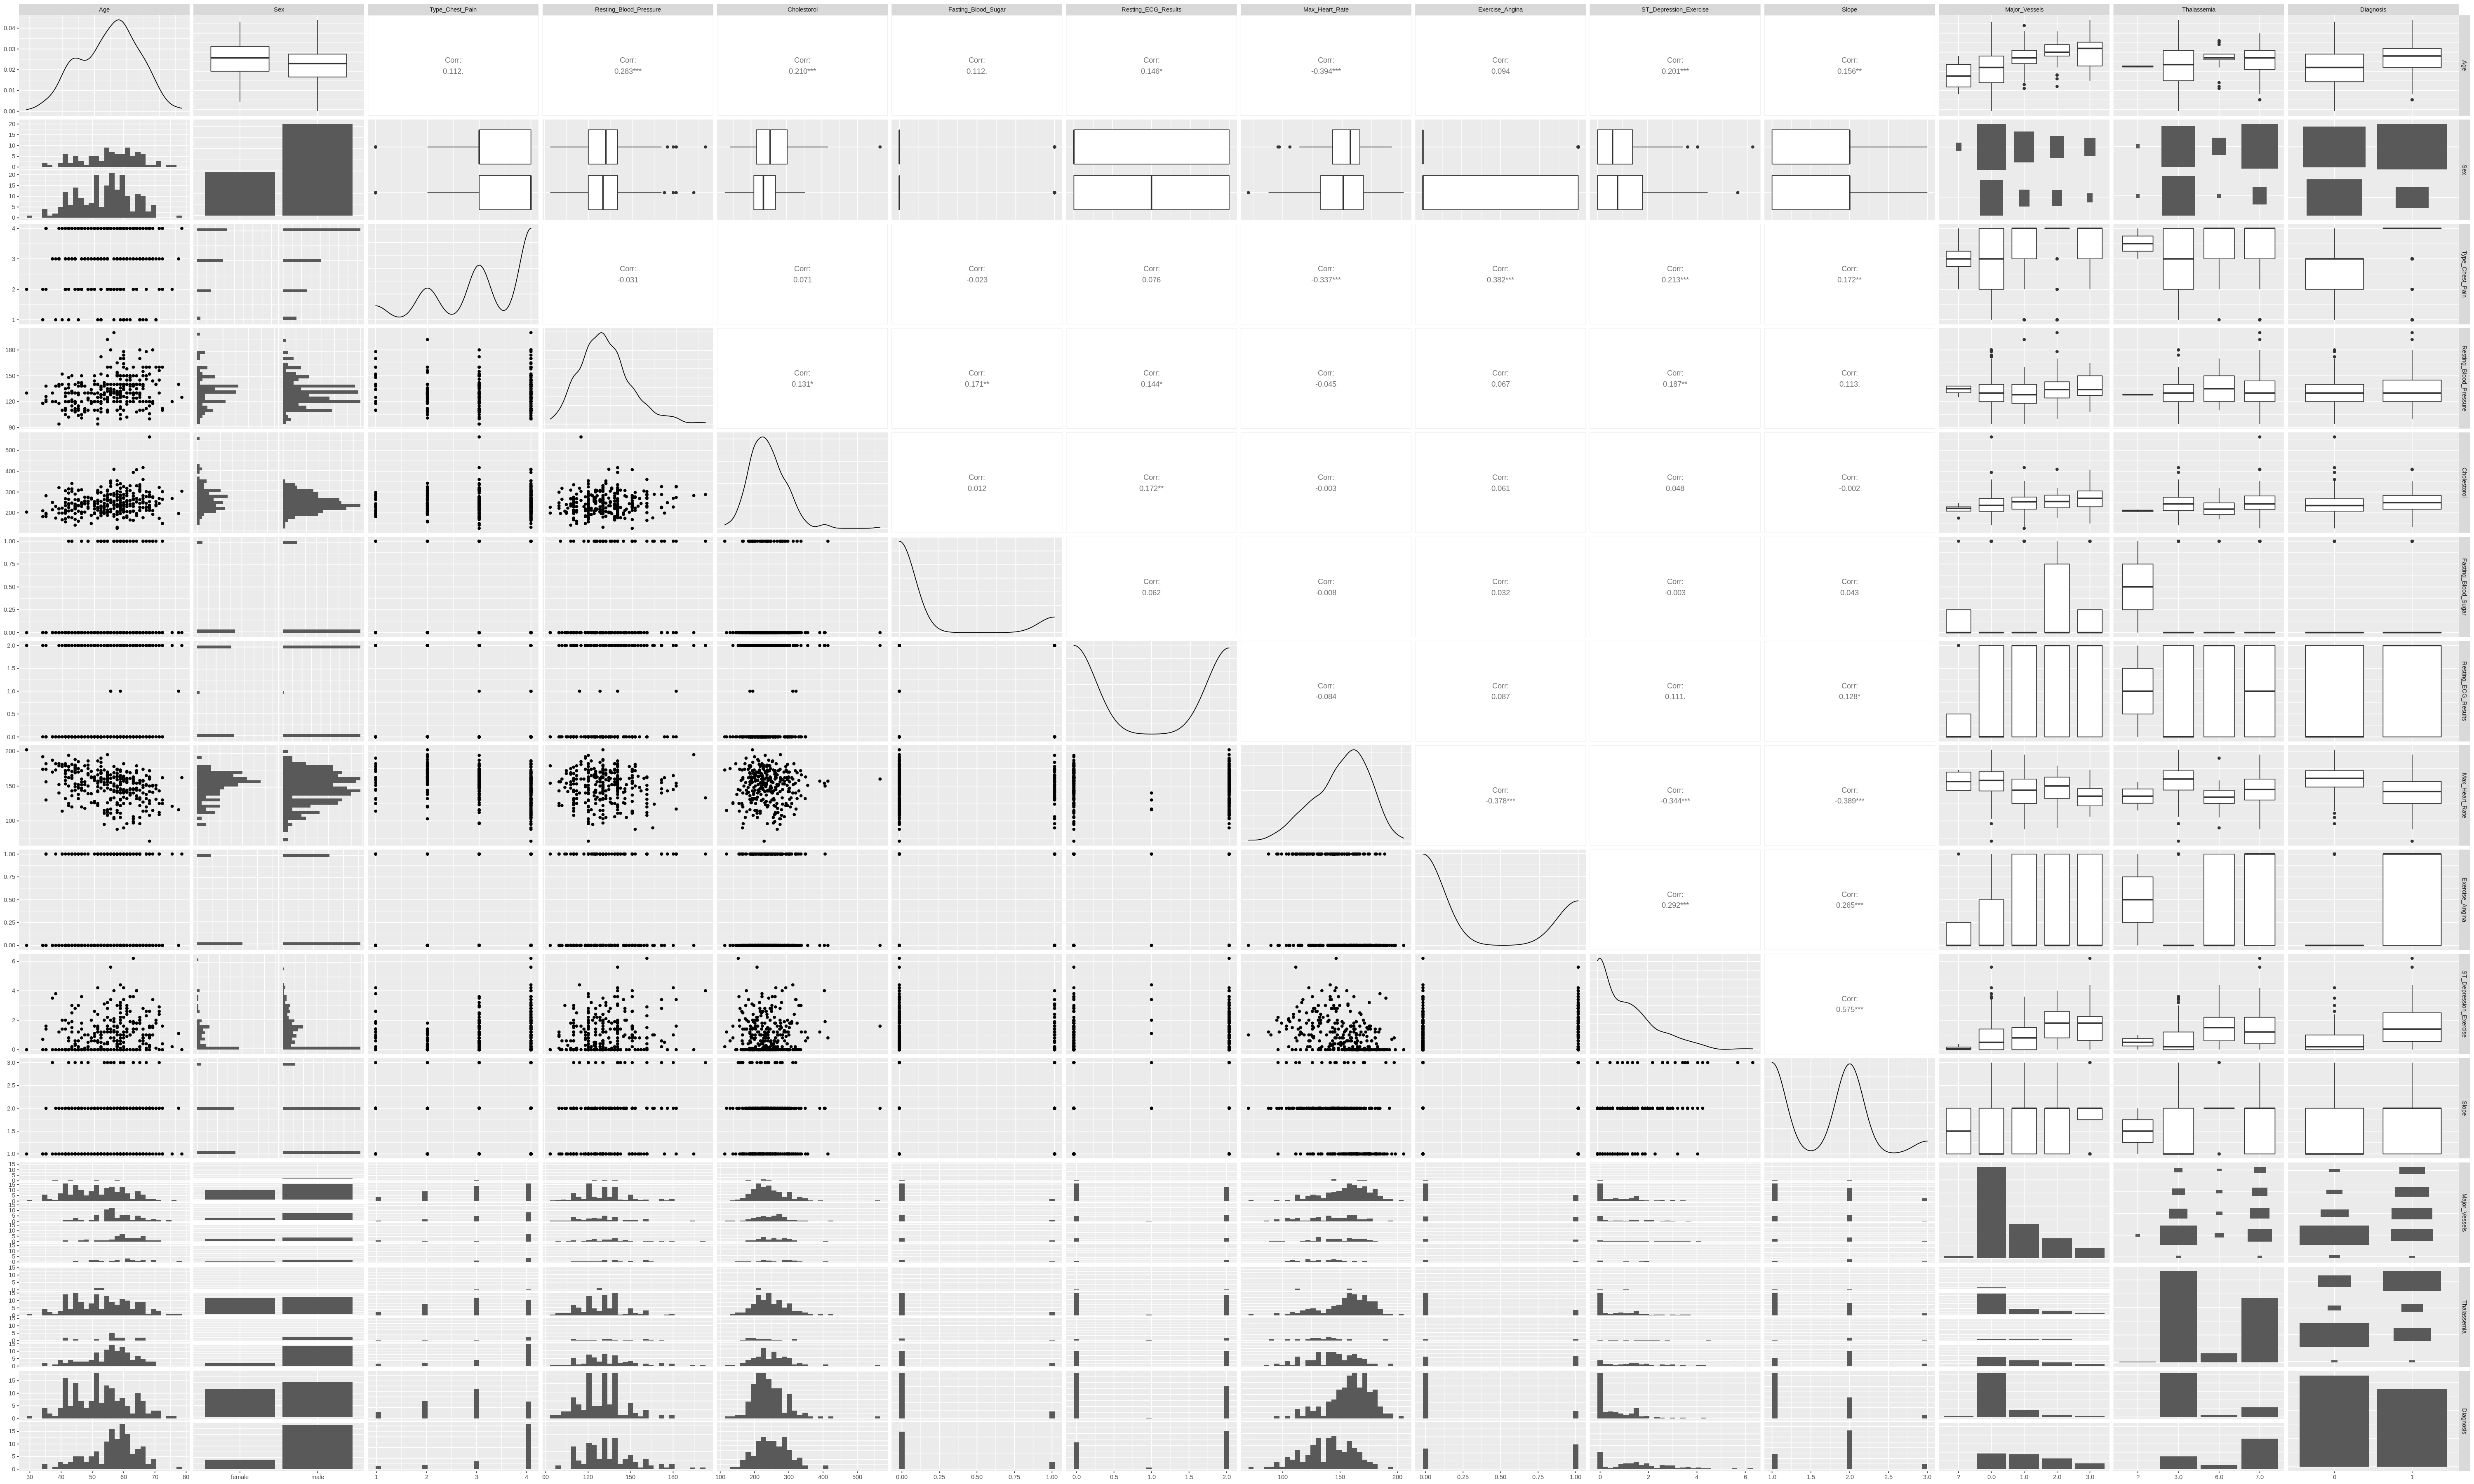

In [11]:
options(repr.plot.height = 30, repr.plot.width = 50)
cleveland_pairs <- cleveland_tidy_data |>
    ggpairs()
cleveland_pairs

In [12]:
set.seed(2000)

cleveland_recipe <- recipe(Diagnosis ~ Cholestorol + Max_Heart_Rate, data = cleveland_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

cleveland_vfold <- vfold_cv(cleveland_training, v = 10, strata = Diagnosis)

k_vals <- tibble(neighbors = seq(1, 100, 5))

knn_results <- workflow() |>
       add_recipe(cleveland_recipe) |>
       add_model(knn_spec) |>
       tune_grid(resamples = cleveland_vfold, grid = k_vals) |>
       collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
      arrange(desc(mean))


accuracies

neighbors,mean
<dbl>,<dbl>
66,0.6953887
61,0.6777668
96,0.6722826
⋮,⋮
36,0.6295125
41,0.6291173
1,0.5696640


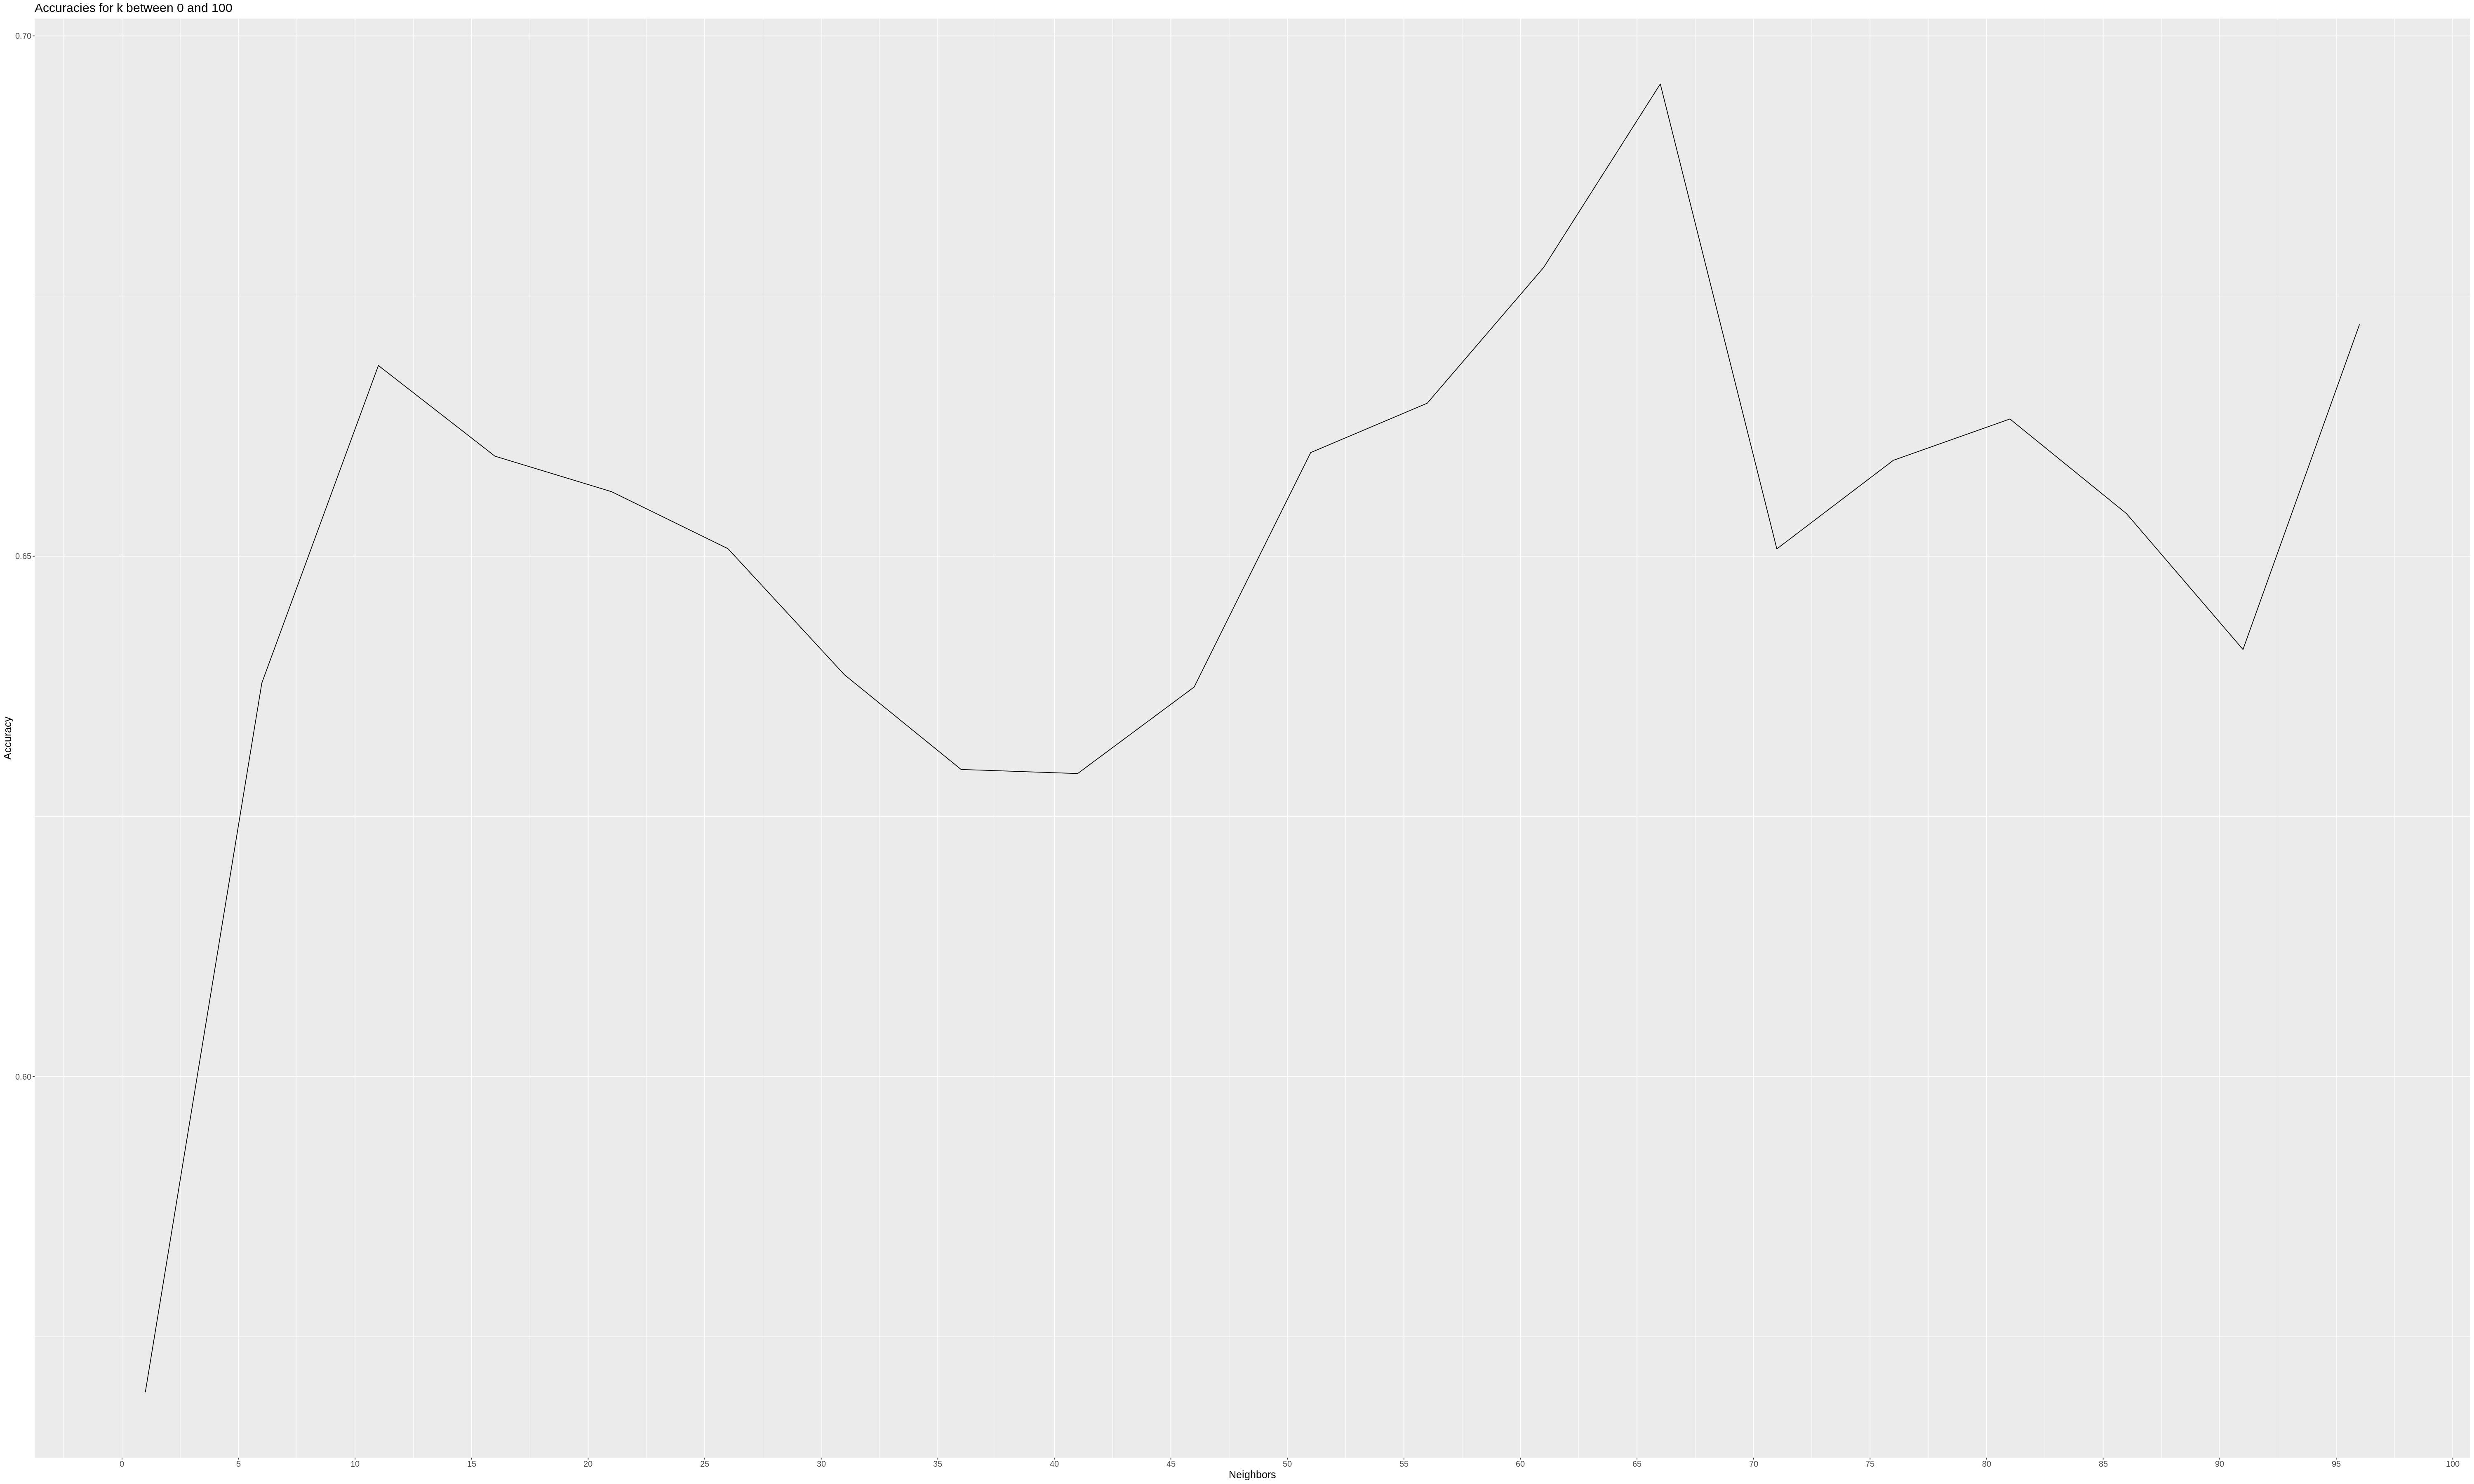

In [13]:
accuracy_k_graph <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy", title = "Accuracies for k between 0 and 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) +
      theme(text = element_text(size = 15))

accuracy_k_graph

In [14]:
set.seed(2001)

knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 66) |>
       set_engine("kknn") |>
       set_mode("classification")

cleveland_fit <- workflow() |>
       add_recipe(cleveland_recipe) |>
       add_model(knn_spec_2) |>
       fit(data = cleveland_training)

cleveland_predictions <- predict(cleveland_fit, cleveland_testing) |>
    bind_cols(cleveland_testing)
cleveland_predictions

cleveland_metrics <- cleveland_predictions |>
    metrics(truth = Diagnosis, estimate = .pred_class)
cleveland_metrics

.pred_class,Age,Sex,Type_Chest_Pain,Resting_Blood_Pressure,Cholestorol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate,Exercise_Angina,ST_Depression_Exercise,Slope,Major_Vessels,Thalassemia,Diagnosis
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
0,53,male,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1
0,56,male,3,130,256,1,2,142,1,0.6,2,1.0,6.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,63,male,4,140,187,0,2,144,1,4.0,1,2.0,7.0,1
0,41,male,2,120,157,0,0,182,0,0.0,1,0.0,3.0,0
1,45,male,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7105263
kap,binary,0.4049822


In [25]:
conf_mat<- cleveland_predictions |>
    conf_mat(truth = Diagnosis, estimate = .pred_class)
conf_mat

          Truth
Prediction  0  1
         0 35 16
         1  6 19

In [26]:
set.seed(2000)

final_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 73)|>
    set_engine("kknn")|>
    set_mode("classification")

fit <- workflow()|>
    add_recipe(cleveland_recipe)|>
    add_model(final_spec)|>
    fit(data = cleveland_training)

fit

ERROR: [1m[33mError[39m in [1m[1m`check_type()`:[22m
[33m![39m All columns selected for the step should be numeric


## Expected outcomes and significance:

#### Answering our predictive question
We are expect to find whether or not a patient will be more likely to have a positive diagnosis of heart disease based on lower max heart rate and higher age.

#### Findings
Our findings could have potential implications for the early detection and prevention of heart disease. This analysis could lead to further questions about the most important predictors of heart disease and the effectiveness of different interventions for preventing heart disease.

#### Impact of this findings
Being able to have a classification system for heart disease would be very helpful for the doctors and also the health care industry. From this findings we could make doctors diagnose a heart disease faster and more accurate. Therefore, they could help diagnose more patients and save more people when they identify heart disease earlier before it gets worse. Also, this could potentially increase efficiency in the health care industry. Being accurate and efficient is crucial because a false diagnosis would potentially lead to a person's life. Though the accuracy of the classifier is relatively high, we would recommend that more studies are required as there are more factors that impacted heart disease.

#### Some further questions we have

1. Is there any potential relationship between each predictor?

2. To prevent heart disease, is there any other predictor we can measure and analyze?

### References:

For our project, in addition to our chosen dataset, we used two sources to do some background research. These sources can be found below:

“Know Your Risk for Heart Disease.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 21 Mar. 2023, www.cdc.gov/heartdisease/risk_factors.htm#:~:text=Eating%20a%20diet%20high%20in,can%20lead%20to%20heart%20disease. 

“Processed.cleveland.data.” archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data. 

Rawat, Shubhankar. “Heart Disease Prediction.” Medium, Towards Data Science, 28 June 2021, towardsdatascience.com/heart-disease-prediction-73468d630cfc. 